In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3.4.1 순차 모델 (Sequential model)


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([

  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
  Dense(10, activation='softmax')

])

In [2]:
model = Sequential()

model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [3]:
from tensorflow.keras import Input

model = Sequential()

model.add(Input(shape=(28,28)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 28, 32)            928       
                                                                 
 dense_7 (Dense)             (None, 28, 16)            528       
                                                                 
 dense_8 (Dense)             (None, 28, 10)            170       
                                                                 
Total params: 1,626
Trainable params: 1,626
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential(name='model')

model.add(Input(shape=(28,28)))
model.add(Dense(32, activation='relu', name='layer1'))
model.add(Dense(16, activation='relu', name='layer2'))
model.add(Dense(10, activation='softmax', name='layer3'))

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 28, 32)            928       
                                                                 
 layer2 (Dense)              (None, 28, 16)            528       
                                                                 
 layer3 (Dense)              (None, 28, 10)            170       
                                                                 
Total params: 1,626
Trainable params: 1,626
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential(name='model')

model.add(Dense(32, activation='relu', name='layer1', input_shape=(28,28)))
model.add(Dense(16, activation='relu', name='layer2'))
model.add(Dense(10, activation='softmax', name='layer3'))

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 28, 32)            928       
                                                                 
 layer2 (Dense)              (None, 28, 16)            528       
                                                                 
 layer3 (Dense)              (None, 28, 10)            170       
                                                                 
Total params: 1,626
Trainable params: 1,626
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential(name='model')

model.add(Dense(32, activation='relu', name='layer1', input_dim=784))
model.add(Dense(16, activation='relu', name='layer2'))
model.add(Dense(10, activation='softmax', name="layer3"))

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 32)                25120     
                                                                 
 layer2 (Dense)              (None, 16)                528       
                                                                 
 layer3 (Dense)              (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


## 3.4.2 함수형 API 

### Functional API


In [7]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense

input = Input(shape=(784,))
x = Dense(units=32, activation='relu')(input)
x = Dense(units=16, activation='relu')(x)
output = Dense(units=10, activation='softmax')(x)

model = Model(inputs=input, outputs=output, name='mnist')
model.summary()

Model: "mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 32)                25120     
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


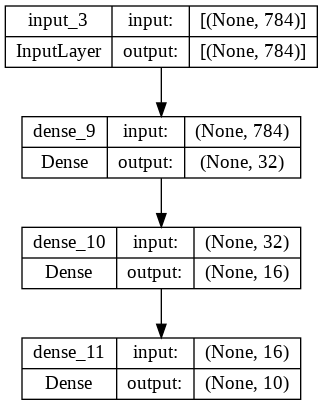

In [8]:
from tensorflow.keras.utils import plot_model

plot_model(model, "mnist-model.png", show_shapes=True)

In [9]:
from tensorflow.keras.layers import concatenate

input_image = Input(shape=(784,), name="input_image")
input_csv = Input(shape=(13,), name="input_csv")

x1 = Dense(units=32, activation="relu", name="layer10")(input_image)
x1 = Dense(units=16, activation="relu", name="layer11")(x1)
output_image = Dense(units=10, activation='softmax', name="output_image")(x1)

x2 = Dense(units=16, activation="relu", name="layer20")(input_csv)
x2 = Dense(units=8, activation="relu", name="layer21")(x2)
output_csv = Dense(units=1, activation='sigmoid', name="output_csv")(x2)

# keras.layers.concatenate
x3 = concatenate([output_image, output_csv], name="layer30")
output = Dense(8, activation="sigmoid", name="output")(x3)

model = Model([input_image, input_csv], output, name="Model : Multiple Inputs")
model.summary()

Model: "Model : Multiple Inputs"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 784)]        0           []                               
                                                                                                  
 input_csv (InputLayer)         [(None, 13)]         0           []                               
                                                                                                  
 layer10 (Dense)                (None, 32)           25120       ['input_image[0][0]']            
                                                                                                  
 layer20 (Dense)                (None, 16)           224         ['input_csv[0][0]']              
                                                                            

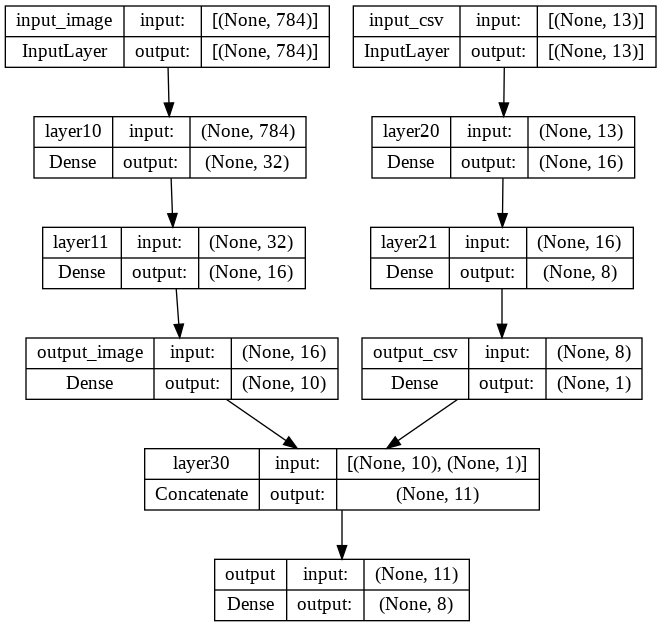

In [10]:
from tensorflow.keras.utils import plot_model

plot_model(model, "mnist-model.png", show_shapes=True)

In [11]:
from tensorflow.keras.layers import concatenate

input = Input(shape=(784,), name="input")

x = Dense(units=32, activation="relu", name="layer1")(input)
x = Dense(units=16, activation="relu", name="layer2")(x)
x = Dense(units=8, activation="relu", name="layer3")(x)

outputA = Dense(units=10, activation='softmax', name="output_a")(x)
outputB = Dense(units=1, activation='sigmoid', name="output_b")(x)

model = Model(input, [outputA, outputB], name="Model : Multiple Oututs")
model.summary()

Model: "Model : Multiple Oututs"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 784)]        0           []                               
                                                                                                  
 layer1 (Dense)                 (None, 32)           25120       ['input[0][0]']                  
                                                                                                  
 layer2 (Dense)                 (None, 16)           528         ['layer1[0][0]']                 
                                                                                                  
 layer3 (Dense)                 (None, 8)            136         ['layer2[0][0]']                 
                                                                            

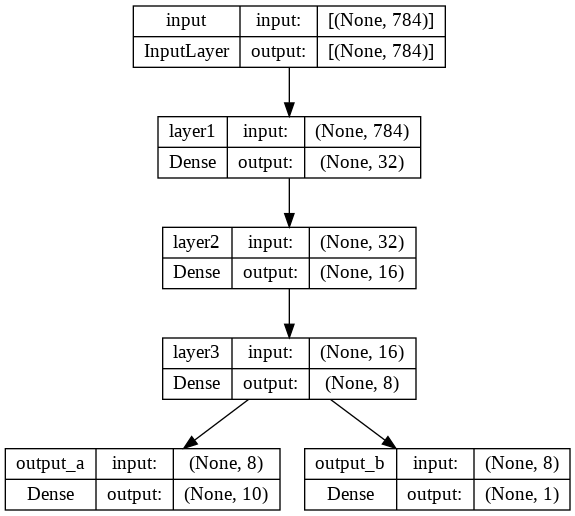

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model, "mnist-model.png", show_shapes=True)

In [13]:
from tensorflow.keras.layers import concatenate

input_imageA = Input(shape=(784,), name="input_imageA")
input_imageB = Input(shape=(784,), name="input_imageB")

# Shared layers
dense_layer = Dense(units=32, activation="relu")

output_imageA = dense_layer(input_imageA)
output_imageB = dense_layer(input_imageB)

# keras.layers.concatenate
x = concatenate([output_imageA, output_imageB])
output = Dense(10, activation="softmax", name="output")(x)

model = Model([input_imageA, input_imageB], output, name="Model : Shared layers")
model.summary()

Model: "Model : Shared layers"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_imageA (InputLayer)      [(None, 784)]        0           []                               
                                                                                                  
 input_imageB (InputLayer)      [(None, 784)]        0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 32)           25120       ['input_imageA[0][0]',           
                                                                  'input_imageB[0][0]']           
                                                                                                  
 concatenate (Concatenate)      (None, 64)           0           ['dense_12[0]

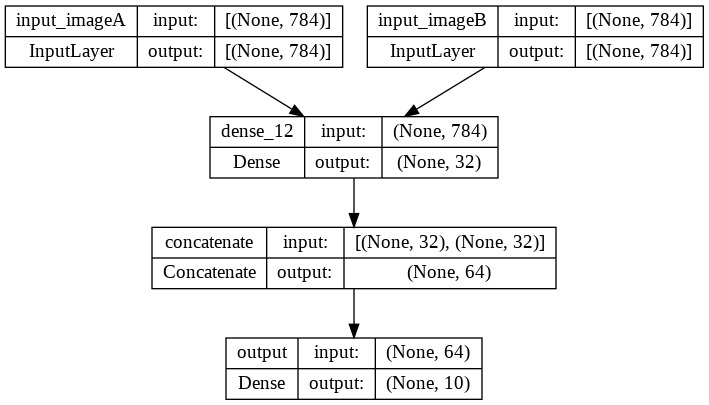

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(model, "mnist-model.png", show_shapes=True)

## 3.4.3 모델 서브클래싱

### models subclassing


In [15]:
class MnistModel(tf.keras.Model):
  def __init__(self):
    super(MnistModel, self).__init__()
    self.layer1 = Dense(32, activation='relu')
    self.layer2 = Dense(16, activation='relu')
    self.layer3 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    return x

In [16]:
model = MnistModel()
model(Input(shape=(784,)))

model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            multiple                  25120     
                                                                 
 dense_14 (Dense)            multiple                  528       
                                                                 
 dense_15 (Dense)            multiple                  170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class MnistModel(tf.keras.Model):
  def __init__(self, units, activation):
    super(MnistModel, self).__init__()
    self.layer1 = Dense(units, activation=activation)
    self.layer2 = Dense(units/2, activation=activation)
    self.layer3 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    return x

In [ ]:
model = MnistModel(units=32, activation='relu')
model(Input(shape=(784,)))

model.summary()

Model: "mnist_model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            multiple                  25120     
                                                                 
 dense_52 (Dense)            multiple                  528       
                                                                 
 dense_53 (Dense)            multiple                  170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


## 3.4.4 모델 함수화

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=784))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'],
    )
    return model

model = get_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                25120     
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


## 3.4.5 모델 컴파일



In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.compile(optimizer='adam', 
              loss={'output_a' : 'categorical_crossentropy',
                    'output_b' : 'binary_crossentropy'})

## 3.4.6 모델 저장 및 불러오기

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='mnist-model')
model.add(Dense(32, activation='relu', name='layer1', input_dim=784))
model.add(Dense(16, activation='relu', name='layer2'))
model.add(Dense(10, activation='softmax', name='layer3'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 모델 저장하기
model.save("/content/drive/MyDrive/Colab Notebooks/model")

Model: "mnist-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 32)                25120     
                                                                 
 layer2 (Dense)              (None, 16)                528       
                                                                 
 layer3 (Dense)              (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [21]:
from tensorflow.keras.models import load_model

# 모델 불러오기
model = load_model("/content/drive/MyDrive/Colab Notebooks/model")

model.summary()

Model: "mnist-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 32)                25120     
                                                                 
 layer2 (Dense)              (None, 16)                528       
                                                                 
 layer3 (Dense)              (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [22]:
from tensorflow.keras.models import save_model, load_model

# save_model
model.save("/content/drive/MyDrive/Colab Notebooks/model")

save_model(model=model, filepath="/content/drive/MyDrive/Colab Notebooks/model")

# load_model
model = load_model("/content/drive/MyDrive/Colab Notebooks/model")

In [23]:
!ls -1 "/content/drive/MyDrive/Colab Notebooks/model/"

assets
keras_metadata.pb
saved_model.pb
variables


In [24]:
# 케라스 h5 파일 형식으로 모델 저장
model.save("/content/drive/MyDrive/Colab Notebooks/model/model-h5/mnist-model-h5.h5")

model = load_model("/content/drive/MyDrive/Colab Notebooks/model/model-h5/mnist-model-h5.h5")

model.summary()

Model: "mnist-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 32)                25120     
                                                                 
 layer2 (Dense)              (None, 16)                528       
                                                                 
 layer3 (Dense)              (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [25]:
!ls -1 "/content/drive/MyDrive/Colab Notebooks/model/model-h5"

mnist-model-h5.h5


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense

modelA = Sequential([Input((784,)), Dense(32), Dense(16), Dense(10)], name = "modelA")

config = modelA.get_config()
modelB = Sequential.from_config(config)

modelB.summary()

Model: "modelA"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 32)                25120     
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras import Model, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

input = Input((32,))
output = Dense(1)(input)
modelA = Model(input, output, name="modelA")

config = modelA.get_config()
modelB = Model.from_config(config)

modelB.summary()

Model: "modelA"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense

from tensorflow.keras.models import model_from_json

modelA = Sequential([Input((784,)), Dense(32), Dense(16), Dense(10)] , name = "modelA")

json_config = modelA.to_json()

modelB = model_from_json(json_config)

print(json_config)

{"class_name": "Sequential", "config": {"name": "modelA", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_7"}}, {"class_name": "Dense", "config": {"name": "dense_23", "trainable": true, "dtype": "float32", "units": 32, "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_24", "trainable": true, "dtype": "float32", "units": 16, "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_re

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name="minit-model")
model.add(Dense(32, activation="relu", name="layer1", input_shape=(784,)))
model.add(Dense(16, activation="relu", name="layer2"))
model.add(Dense(10, activation='softmax', name="layer3"))

model.save_weights("/content/drive/MyDrive/Colab Notebooks/model/weights/minit-weight")

model.load_weights("/content/drive/MyDrive/Colab Notebooks/model/weights/minit-weight")

In [30]:
!ls -1 "/content/drive/MyDrive/Colab Notebooks/model/weights"

checkpoint
minit-weight.data-00000-of-00001
minit-weight.index
